In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('mcd_merge.csv')
# Inspect the data
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24 14:30:00-04:00,244.699997,244.809998,244.639999,244.699997,244.699997,0
1,2022-05-24 14:31:00-04:00,244.744995,244.744995,244.470001,244.690002,244.690002,7992
2,2022-05-24 14:32:00-04:00,244.740005,244.990005,244.660004,244.862000,244.862000,7028
3,2022-05-24 14:33:00-04:00,244.923706,245.070007,244.860001,245.035004,245.035004,5297
4,2022-05-24 14:34:00-04:00,245.050003,245.050003,244.850006,245.000000,245.000000,14413


In [2]:
df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

train_data_date = data_date[0:int(training_data_date), :]

In [3]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set

#changes scaled_data to dataset
train_data = scaled_data[0:int(training_data_len), :] 
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.56458207, 0.5641259 , 0.57197607, 0.57987219, 0.57827458,
       0.57873074, 0.57416703, 0.57804615, 0.57599238, 0.57485163,
       0.57188483, 0.56823345, 0.56663584, 0.55682314, 0.55408477,
       0.55545395, 0.54815119, 0.54130528, 0.53263333, 0.5248744 ,
       0.51939767, 0.52441824, 0.53035113, 0.53217717, 0.52898194,
       0.52122302, 0.52692817, 0.53308949, 0.54404364, 0.54187565,
       0.53354635, 0.55134641, 0.56047452, 0.57325401, 0.56640811,
       0.57827458, 0.56366905, 0.5595615 , 0.5618437 , 0.56047452,
       0.56672707, 0.56047452, 0.56321288, 0.56047452, 0.56093068,
       0.56001836, 0.56275672, 0.56229986, 0.56376097, 0.55819232,
       0.54952037, 0.55317175, 0.56344131, 0.56458207, 0.56229986,
       0.55317175, 0.55088955, 0.55864918, 0.55499779, 0.56823345])]
[0.5750793582256062]

[array([0.56458207, 0.5641259 , 0.57197607, 0.57987219, 0.57827458,
       0.57873074, 0.57416703, 0.57804615, 0.57599238, 0.57485163,
       0.57188483, 0.56823345, 0.566

Epoch 1/100
413/413 [==============================] - 16s 32ms/step - loss: 0.0058
Epoch 2/100
413/413 [==============================] - 18s 43ms/step - loss: 0.0016
Epoch 3/100
413/413 [==============================] - 13s 31ms/step - loss: 8.4056e-04
Epoch 4/100
413/413 [==============================] - 17s 40ms/step - loss: 6.8858e-04
Epoch 5/100
413/413 [==============================] - 29s 70ms/step - loss: 5.1701e-04
Epoch 6/100
413/413 [==============================] - 34s 83ms/step - loss: 4.1071e-04
Epoch 7/100
413/413 [==============================] - 46s 111ms/step - loss: 3.8163e-04
Epoch 8/100
413/413 [==============================] - 37s 90ms/step - loss: 2.8470e-04
Epoch 9/100
413/413 [==============================] - 45s 108ms/step - loss: 3.1499e-04
Epoch 10/100
413/413 [==============================] - 37s 89ms/step - loss: 3.2249e-04
Epoch 11/100
413/413 [==============================] - 38s 91ms/step - loss: 2.5906e-04
Epoch 12/100
413/413 [==============

413/413 [==============================] - 45s 109ms/step - loss: 1.7906e-04
Epoch 94/100
413/413 [==============================] - 52s 127ms/step - loss: 1.6511e-04
Epoch 95/100
413/413 [==============================] - 44s 107ms/step - loss: 1.7079e-04
Epoch 96/100
413/413 [==============================] - 35s 84ms/step - loss: 1.7528e-04
Epoch 97/100
413/413 [==============================] - 42s 101ms/step - loss: 1.7128e-04
Epoch 98/100
413/413 [==============================] - 32s 77ms/step - loss: 1.8729e-04
Epoch 99/100
413/413 [==============================] - 34s 82ms/step - loss: 1.7109e-04
Epoch 100/100
413/413 [==============================] - 33s 81ms/step - loss: 1.5784e-04


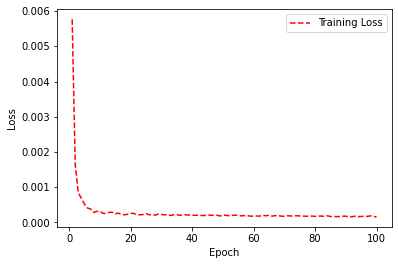

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import array
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True, activation='relu' ))
model.add(LSTM(64, return_sequences=True, activation='relu' ))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')


# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100)

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [12]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test) ** 2)))
rmse

0.15809270458134822

In [13]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions3'] = predictions3

mape(valid_3['Close'], valid_3['Predictions3'])

<ipython-input-13-20d8112ecf7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions3'] = predictions3


0.04493420789019809

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 59, 128)           384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 29, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 29, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 29, 32)            12416     
                                                                 
 flatten (Flatten)           (None, 928)               0         
                                                        